In [3]:
# Chargement des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données

On importe les données de 2020 à 2022

In [5]:
# Année 2022
df_carac_2022 = pd.read_csv("../data/caracteristiques_2022.csv", sep=';', low_memory=False)
df_lieux_2022 = pd.read_csv("../data/lieux_2022.csv", sep=';', low_memory=False)
df_usagers_2022 = pd.read_csv("../data/usagers_2022.csv", sep=';', low_memory=False)
df_vehicules_2022 = pd.read_csv("../data/vehicules_2022.csv", sep=';', low_memory=False)

# Année 2021
df_carac_2021 = pd.read_csv("../data/caracteristiques_2021.csv", sep=';', low_memory=False)
df_lieux_2021 = pd.read_csv("../data/lieux_2021.csv", sep=';', low_memory=False)
df_usagers_2021 = pd.read_csv("../data/usagers_2021.csv", sep=';', low_memory=False)
df_vehicules_2021 = pd.read_csv("../data/vehicules_2021.csv", sep=';', low_memory=False)

# Année 2020
df_carac_2020 = pd.read_csv("../data/caracteristiques_2020.csv", sep=';', low_memory=False)
df_lieux_2020 = pd.read_csv("../data/lieux_2020.csv", sep=';', low_memory=False)
df_usagers_2020 = pd.read_csv("../data/usagers_2020.csv", sep=';', low_memory=False)
df_vehicules_2020 = pd.read_csv("../data/vehicules_2020.csv", sep=';', low_memory=False)


# Jointure

In [7]:
# On modifie le nom de la colonne de df_carac_2022

df_carac_2022.rename(columns={'Accident_Id': 'Num_Acc'}, inplace=True)

In [8]:
# On joint les df par années

df_merged_2022_1 = pd.merge(df_usagers_2022, df_vehicules_2022, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2022_2 = pd.merge(df_merged_2022_1, df_lieux_2022, on='Num_Acc')
df_merged_2022 = pd.merge(df_merged_2022_2, df_carac_2022, on='Num_Acc')

In [9]:
# On fait de même avec les autres années

df_merged_2021_1 = pd.merge(df_usagers_2021, df_vehicules_2021, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2021_2 = pd.merge(df_merged_2021_1, df_lieux_2021, on='Num_Acc')
df_merged_2021 = pd.merge(df_merged_2021_2, df_carac_2021, on='Num_Acc')

df_merged_2020_1 = pd.merge(df_usagers_2020, df_vehicules_2020, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2020_2 = pd.merge(df_merged_2020_1, df_lieux_2020, on='Num_Acc')
df_merged_2020 = pd.merge(df_merged_2020_2, df_carac_2020, on='Num_Acc')

In [10]:
# On concat le tout dans un seul df

df_merged = pd.concat([df_merged_2022, df_merged_2021, df_merged_2020], axis=0, ignore_index=True)

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361205 entries, 0 to 361204
Data columns (total 55 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      361205 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  361205 non-null  object 
 3   num_veh      361205 non-null  object 
 4   place        361205 non-null  int64  
 5   catu         361205 non-null  int64  
 6   grav         361205 non-null  int64  
 7   sexe         361205 non-null  int64  
 8   an_nais      355264 non-null  float64
 9   trajet       361205 non-null  int64  
 10  secu1        361205 non-null  int64  
 11  secu2        361205 non-null  int64  
 12  secu3        361205 non-null  int64  
 13  locp         361205 non-null  int64  
 14  actp         361205 non-null  object 
 15  etatp        361205 non-null  int64  
 16  senc         361205 non-null  int64  
 17  catv         361205 non-null  int64  
 18  obs          361205 non-

## Pré-traitement

Observations dupliquées ?

In [14]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 63


In [15]:
# On supprime les lignes dupliquées

df_merged = df_merged.drop_duplicates(keep = 'first')

In [16]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 0


Les variables peuvent prendre la valeur de '-1' qui signifie 'Non renseigné'. Pour mieux gérer le nettoyage du df, on remplace cette valeur par un NaN.


In [18]:
df_merged = df_merged.replace(-1, np.nan)
df_merged = df_merged.replace('-1', np.nan)  # Si format txt
df_merged = df_merged.replace(' -1', np.nan)  # Si format txt

Visualisation des taux de NaN par variable

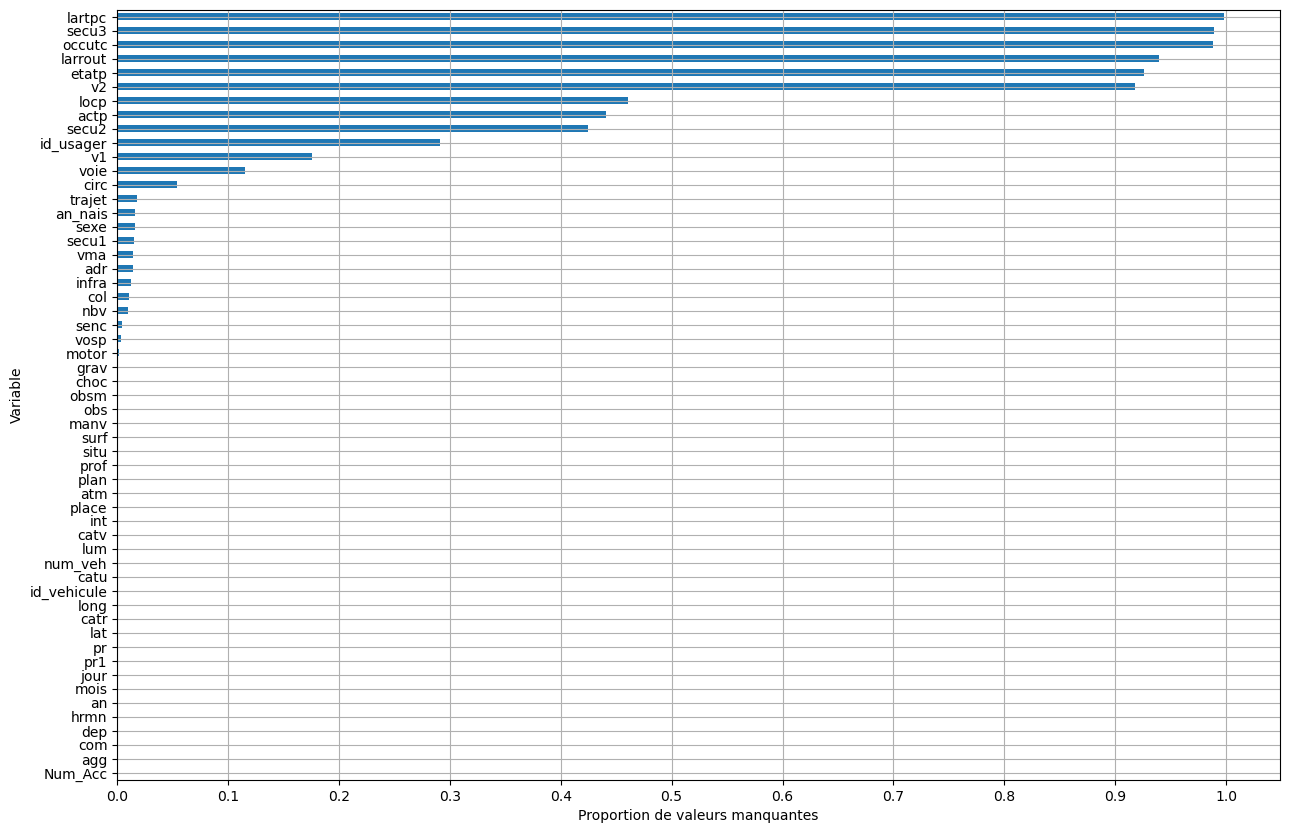

In [20]:
nan_col = df_merged.isna().sum().sort_values(ascending=True)/df_merged.shape[0]
nan_col.plot.barh(figsize=(15,10))  # On trace via pandas
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)
plt.xlabel('Proportion de valeurs manquantes')
plt.ylabel('Variable')
plt.show();

Les variables suivantes ont des taux de NaN supérieurs à 10% :
- lartpc : largeur du TPC si existe
- secu3 : Présence et utilisation d'un équipeemnt de sécurité (3eme renseignement possible)
- occutc : Nb d'occupants dans le transport en commun
- larrout : Largeur de la chaussée
- etatp : Si piéton accidenté accompagné ou non
- v2 : Lettre indice alphanum de la route
- locp : Localisation du piéton
- actp : Action du piéton
- secu2 : Présence et utilisation d'un équipeemnt de sécurité (2eme renseignement possible)
- id_usager : Identifiant unique de l'usager (que depuis 2021)
- v1 : Indice num du numéro de route
- voie : Numéro de la route

Au vu du nombre important de NaN, ces variables ne seront pas analysées (gestion des NaN peu envisageable). Nous faisons cependant l'exception pour les équipements de sécurité. Ils seront regroupés dans des variables pour chaque élément.

3 variables concernant les piétons sont également non utilisables. Pour la suite, on retirera également les autres variables en lien avec des piétons (catu = 3 (Piéton))

Pour la localisation des accidents, du fait d'avoir les latitudes et longitudes, nous pouvons supprimer les autres variables. Nous gardons tout de même la variable dep (département) et com (commune).

In [23]:
df_merged = df_merged.drop(['lartpc', 'occutc', 'larrout', 'etatp', 'locp', 'actp', 'id_usager',
                            'voie', 'v1', 'v2', 'adr', 'pr', 'pr1'], axis=1)

df_merged = df_merged[df_merged["catu"] != 3]

On trie les variables 'secu', 'secu2' et 'secu3'

In [25]:
df_merged['Ceinture'] = df_merged[['secu1', 'secu2', 'secu3']].isin([1]).any(axis=1)
df_merged['Casque'] = df_merged[['secu1', 'secu2', 'secu3']].isin([2]).any(axis=1)
df_merged['Dispositif enfants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([3]).any(axis=1)
df_merged['Gilet réfléchissant'] = df_merged[['secu1', 'secu2', 'secu3']].isin([4]).any(axis=1)
df_merged['Airbag'] = df_merged[['secu1', 'secu2', 'secu3']].isin([5, 7]).any(axis=1)
df_merged['Gants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([6, 7]).any(axis=1)
df_merged['Autre equipement'] = df_merged[['secu1', 'secu2', 'secu3']].isin([9]).any(axis=1)

df_merged = df_merged.drop(['secu1', 'secu2', 'secu3'], axis=1)

On enlève les limitations de vitesse > à 130 km/h

In [27]:
df_merged.loc[df_merged['vma'] > 130, 'vma'] = np.nan

On convertit dans le bon format les latitudes et longitudes

In [29]:
df_merged['lat'] = df_merged['lat'].str.replace(',', '.').astype(float)
df_merged['long'] = df_merged['long'].str.replace(',', '.').astype(float)

On ne garde pas les victimes trop vieilles

In [31]:
df_merged = df_merged[df_merged["an_nais"] >= 1920]

In [32]:
# On convertit le df pour avoir des dates exploitables

df_merged['date'] = df_merged['jour'].astype(str) + '-' + df_merged['mois'].astype(str) + '-' + df_merged['an'].astype(str) + '-' 
df_merged['date'] = pd.to_datetime(df_merged['date'], dayfirst=True)


In [33]:
# On crée une variable région

region = pd.read_csv("../data/departements-region.csv")
region = region.rename(columns={'num_dep': 'dep'})

df_merged = df_merged.merge(region, how='left', on='dep')

### Traitement de la donnée en vue de la modélisation
Ce regroupement se base sur les observations faites lors de la data visualisation

In [35]:
# On crée une variable heure

df_merged['hrmn'] = df_merged['hrmn'].str.replace(':', '')
df_merged['heure'] = df_merged['hrmn'].astype(int)//100

# On supprime la variable initiale
df_merged = df_merged.drop(['hrmn'], axis=1)


In [36]:
# Variable place : place dans le véhicule

# Modalité : 1 à 9
# On regroupe en 3 catégories : conducteur, passager avant, passager arrière
df_merged['place'] = df_merged['place'].astype(int)

df_merged['conducteur'] = df_merged['place'].apply(lambda x: 1 if x==1 else 0)
df_merged['passager_avant'] = df_merged['place'].apply(lambda x: 1 if x in [2, 6] else 0)
df_merged['passager_arrière'] = df_merged['place'].apply(lambda x: 1 if x not in [1, 2, 6] else 0)

# On supprime la variable initiale
df_merged = df_merged.drop(['place'], axis=1)


In [37]:
# Variable catu : conducteur ou passager

# Modalité 1 (conducteur) ou 2 (passager)
# Le nombre d'occurence entre conducteur ou passager n'est pas cohérent avec celui de la variable place
# (263561 conducteurs contre 263915 pour variable catu)
# On garde la variable place car plus précise

df_merged = df_merged.drop(['catu'], axis=1)


In [38]:
# Variable grav : gravité de l'accident

# Modalité : 'Indemne' (1), 'Tué' (2), 'Blessé hospitalisé' (3), 'Blessé léger' (4)
# Variable cible
# On supprime le seul NaN présent

df_merged = df_merged.dropna(subset=['grav'])
df_merged['grav'] = df_merged['grav'].astype(int)


In [39]:
# Variable sexe : sexe de l'usager

# Modalité : Masculin' (1), 'Féminin' (2)
# Nb NaN : 4, on remplace par le mode

df_merged['sexe'] = df_merged['sexe'].fillna(df_merged['sexe'].mode()[0])
df_merged['sexe'] = df_merged['sexe'].astype(int)


In [40]:
# Variable an_nais : année de naissance de l'usager

# On tranforme cette variable pour connaître l'âge de l'usager
df_merged['an_nais'] = df_merged['an_nais'].astype(int)

df_merged['age'] = df_merged['an'] - df_merged['an_nais']


In [41]:
# Variable trajet : motif du trajet

# Modalité : 5.  9.  4.  0. nan  2.  3.  1.
# Nb NaN : 503, on remplace par le mode

df_merged['trajet'] = df_merged['trajet'].replace(0, np.nan)
df_merged['trajet'] = df_merged['trajet'].fillna(df_merged['trajet'].mode()[0])
df_merged['trajet'] = df_merged['trajet'].astype(int)

# On regroupe en 3 catégorie : autre, pro ou perso
df_merged['trajet_pro'] = df_merged['trajet'].apply(lambda x: 1 if x in [1, 4] else 0)
df_merged['trajet_perso'] = df_merged['trajet'].apply(lambda x: 1 if x in [2, 3, 5] else 0)
df_merged['trajet_autre'] = df_merged['trajet'].apply(lambda x: 1 if x==9 else 0)

df_merged = df_merged.drop(['trajet'], axis=1)


In [42]:
# Variable senc : sens de circulation

# Modalité : 0 1 2 3
# Nb NaN : 1376, on les place dans la catégorie inconnu

df_merged['senc'] = df_merged['senc'].fillna(0)
df_merged['senc'] = df_merged['senc'].astype(int)


In [43]:
# Variable catv : categorie du vehicule

# Modalité : nombreuse
# Nb NaN : 3, on les place dans le mode

df_merged['catv'] = df_merged['catv'].fillna(0)
df_merged['catv'] = df_merged['catv'].astype(int)

# On regroupe en sous-catégorie
df_merged['catv_velo'] = df_merged['catv'].apply(lambda x: 1 if x in [1,80] else 0)
df_merged['catv_moto'] = df_merged['catv'].apply(lambda x: 1 if x in [2,4,5,30,31,32,33,34] else 0)
df_merged['catv_voiture'] = df_merged['catv'].apply(lambda x: 1 if x in [7] else 0)
df_merged['catv_utilitaire'] = df_merged['catv'].apply(lambda x: 1 if x in [10] else 0)
df_merged['catv_veh_remorque'] = df_merged['catv'].apply(lambda x: 1 if x in [8,9,11,12] else 0)
df_merged['catv_PL'] = df_merged['catv'].apply(lambda x: 1 if x in [13,14,15] else 0)
df_merged['catv_tracteur'] = df_merged['catv'].apply(lambda x: 1 if x in [16,17,21] else 0)
df_merged['catv_tram_train'] = df_merged['catv'].apply(lambda x: 1 if x in [19,39,40] else 0)
df_merged['catv_quad_3roues'] = df_merged['catv'].apply(lambda x: 1 if x in [135,36,41,42,43] else 0)
df_merged['catv_autre_inconnu'] = df_merged['catv'].apply(lambda x: 1 if x in [0,3,6,18,20,99] else 0)
df_merged['catv_bus_car'] = df_merged['catv'].apply(lambda x: 1 if x in [37,38] else 0)
df_merged['catv_EDP'] = df_merged['catv'].apply(lambda x: 1 if x in [50,60] else 0)

df_merged = df_merged.drop(['catv'], axis=1)


In [44]:
# Variable obs : obstacle heurté

# Modalité : nombreuse
# Nb NaN : 94, on les place dans le mode

df_merged['obs'] = df_merged['obs'].fillna(df_merged['obs'].mode()[0])
df_merged['obs'] = df_merged['obs'].astype(int)


In [45]:
# Variable obsm : obstacle mobile heurté

# Modalité : nombreuse
# Nb NaN : 129, on les place dans le mode

df_merged['obsm'] = df_merged['obsm'].fillna(df_merged['obsm'].mode()[0])
df_merged['obsm'] = df_merged['obsm'].astype(int)


In [46]:
# Variable choc : point de choc

# Modalité : 0 à 9
# Nb NaN : 118, on les place dans le mode

df_merged['choc'] = df_merged['choc'].fillna(df_merged['choc'].mode()[0])
df_merged['choc'] = df_merged['choc'].astype(int)

# On regroupe en sous-catégorie
df_merged['choc_avant'] = df_merged['choc'].apply(lambda x: 1 if x in [1,2,3] else 0)
df_merged['choc_arriere'] = df_merged['choc'].apply(lambda x: 1 if x in [4,5,6] else 0)
df_merged['choc_cote'] = df_merged['choc'].apply(lambda x: 1 if x in [7,8] else 0)
df_merged['choc_tonneaux'] = df_merged['choc'].apply(lambda x: 1 if x in [9] else 0)
df_merged['choc_aucun'] = df_merged['choc'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['choc'], axis=1)


In [47]:
# Variable manv : manoeuvre lors de l'accident

# Modalité : nombreuse
# Nb NaN : 79, on les place dans le mode

df_merged['manv'] = df_merged['manv'].fillna(df_merged['manv'].mode()[0])
df_merged['manv'] = df_merged['manv'].astype(int)

# On regroupe en sous-catégorie
df_merged['manv_diverse'] = df_merged['manv'].apply(lambda x: 1 if x in [3,4,5,6,7,8,9,10,19,20,21,22,23,24,25,26] else 0)
df_merged['manv_droite'] = df_merged['manv'].apply(lambda x: 1 if x in [12,14,16,18] else 0)
df_merged['manv_gauche'] = df_merged['manv'].apply(lambda x: 1 if x in [11,13,15,17] else 0)
df_merged['manv_pas_chang_dir'] = df_merged['manv'].apply(lambda x: 1 if x in [1] else 0)
df_merged['manv_meme_sens_file'] = df_merged['manv'].apply(lambda x: 1 if x in [2] else 0)
df_merged['manv_inconnue'] = df_merged['manv'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['manv'], axis=1)


In [48]:
# Variable motor : type de moteur

# Modalité : 0 à 6
# Nb NaN : 420

df_merged['motor'] = df_merged['motor'].fillna(0)
df_merged['motor'] = df_merged['motor'].astype(int)


In [49]:
# Variable catr : type de route

# Modalité : 1 à 7, 9
# Nb NaN : 0

df_merged['catr'] = df_merged['catr'].astype(int)


In [50]:
# Variable circ : régime de circulation

# Modalité : 1 à 4
# Nb NaN : 16866 (5% de NaN) -> on essaie de réduire le nb NaN via d'autre variables

# On regroupe en une catégorie : bidirectionnelle ou non

df_merged['circ'] = df_merged['circ'].fillna(df_merged['circ'].mode()[0])
df_merged['chaussee_bidirectionnelle'] = df_merged['circ'].apply(lambda x: 1 if x == 2 else 0)

df_merged['circ'] = df_merged['circ'].astype(int)
df_merged = df_merged.drop(['circ'], axis=1)


In [51]:
# Variable nbv : nombre de voies

# Modalité : 0 à 12
# Nb NaN : 2624

df_merged['nbv'] = df_merged['nbv'].replace('#ERREUR', np.nan)
df_merged['nbv'] = df_merged['nbv'].fillna(df_merged['nbv'].mode()[0])
df_merged['nbv'] = df_merged['nbv'].astype(int)


In [52]:
# Variable vosp : présence d'une voie réservée

# Modalité : 0 à 3
# Nb NaN : 1232

df_merged['vosp'] = df_merged['vosp'].fillna(df_merged['vosp'].mode()[0])
df_merged['voie_reservee'] = df_merged['vosp'].apply(lambda x: 0 if x == 0 else 1)

df_merged = df_merged.drop(['vosp'], axis=1)


In [53]:
# Variable prof : profil en long

# Modalité : 1 à 4
# Nb NaN : 44

df_merged['prof'] = df_merged['prof'].fillna(df_merged['prof'].mode()[0])
df_merged['prof'] = df_merged['prof'].astype(int)


In [54]:
# Variable plan : tracé en plan

# Modalité : 1 à 4
# Nb NaN : 39

df_merged['plan'] = df_merged['plan'].fillna(df_merged['plan'].mode()[0])
df_merged['plan'] = df_merged['plan'].astype(int)


In [55]:
# Variable surf : état de la chaussée

# Modalité : 1 à 9
# Nb NaN : 58

df_merged['surf'] = df_merged['surf'].fillna(df_merged['surf'].mode()[0])
df_merged['surf'] = df_merged['surf'].astype(int)

# On regroupe en une catégorie : chaussée sèche ou non
df_merged['chaussee_seche'] = df_merged['surf'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['surf'], axis=1)


In [56]:
# Variable infra : présence d'un aménagement

# Modalité : 0 à 9
# Nb NaN : 3774

df_merged['infra'] = df_merged['infra'].fillna(df_merged['infra'].mode()[0])
df_merged['infra'] = df_merged['infra'].astype(int)


In [57]:
# Variable situ : situation de l'accident

# Modalité : 1 à 8
# Nb NaN : 42

df_merged['situ'] = df_merged['situ'].fillna(df_merged['situ'].mode()[0])
df_merged['situ'] = df_merged['situ'].astype(int)


In [58]:
# Variable vma : vitesse maximale autorisée

# Modalité : nombreuses
# Nb NaN : 4907

df_merged['vma'] = df_merged['vma'].fillna(df_merged['vma'].mode()[0])
df_merged['vma'] = df_merged['vma'].astype(int)

# On regroupe en sous catégorie
df_merged['vma'] = df_merged['vma'].apply(lambda x: 30 if x<=30. else x)


In [59]:
# Variable lum : luminosité

# Modalité : 1 à 5
# Nb NaN : 7

df_merged['lum'] = df_merged['lum'].fillna(df_merged['lum'].mode()[0])
df_merged['lum'] = df_merged['lum'].astype(int)


In [60]:
# Variable agg : si en agglomération

# Modalité : 1, 2
# Nb NaN : 0

df_merged['agg'] = df_merged['agg'].astype(int)


In [61]:
# Variable int : si intersection

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['int'] = df_merged['int'].fillna(df_merged['int'].mode()[0])
df_merged['int'] = df_merged['int'].astype(int)

# On regroupe en sous-catégorie
df_merged['int_aucune'] = df_merged['int'].apply(lambda x: 1 if x in [1] else 0)
df_merged['int_branches'] = df_merged['int'].apply(lambda x: 1 if x in [2,3,4,5] else 0)
df_merged['int_autre'] = df_merged['int'].apply(lambda x: 1 if x in [6,7,8,9] else 0)

df_merged = df_merged.drop(['int'], axis=1)


In [62]:
# Variable atm : condition atmo

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['atm'] = df_merged['atm'].fillna(df_merged['atm'].mode()[0])
df_merged['atm'] = df_merged['atm'].astype(int)

# On regroupe en une catégorie : cbeau temps ou non
df_merged['atm_normal'] = df_merged['atm'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['atm'], axis=1)


In [63]:
# Variable col : type de collision

# Modalité : 1 à 7
# Nb NaN : 3646

df_merged['col'] = df_merged['col'].fillna(df_merged['col'].mode()[0])
df_merged['col'] = df_merged['col'].astype(int)


In [64]:
# Variables équipement

for item in ['Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement']:
    df_merged[item] = df_merged[item].apply(lambda x: 1 if x else 0)


In [65]:
df_merged_2 = df_merged.drop(['Num_Acc', 'id_vehicule', 'num_veh', 'dep', 'com', 'date', 'dep_name', 'region_name'], axis=1)

In [66]:
num_features = ['heure', 'an_nais', 'age', 'nbv', 'vma', 'lat', 'long', 'jour', 'mois', 'an']
to_cat_features = ['senc', 'obs', 'obsm', 'motor', 'catr', 'prof', 'plan', 'infra', 'situ', 'lum', 'col']


In [67]:
df_cat = df_merged_2.drop(num_features, axis=1)

In [68]:
X = df_cat.drop('grav', axis=1)
y = df_cat['grav']

In [69]:
X = pd.get_dummies(X, columns=to_cat_features, drop_first=True)

### Split du jeu de données

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Transformation variable cible en binaire

In [73]:
y_train = y_train.replace({1:0, 4:1, 3:1, 2:1})
y_test = y_test.replace({1:0, 4:1, 3:1, 2:1})

### XGBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

model_boost = GradientBoostingClassifier(loss="log_loss",
                                         learning_rate=0.2,
                                         max_depth=5,
                                         max_features="sqrt",
                                         subsample=0.95,
                                         n_estimators=200)
model_boost.fit(X_train, y_train)

# Mesure performance modèle
print('Score test :', model_boost.score(X_test, y_test))
print('Score train :', model_boost.score(X_train, y_train))

Score test : 0.7871749904689287
Score train : 0.7905237192953026


Accuracy score test : 0.7871749904689287
Accuracy score train : 0.7905237192953026
Recall test : 0.7861082467280863
f1 score test : 0.7850716728696547


Prédiction,0,1
Réalité,,
0,22566,6486
1,7470,29053


              precision    recall  f1-score   support

           0       0.75      0.78      0.76     29052
           1       0.82      0.80      0.81     36523

    accuracy                           0.79     65575
   macro avg       0.78      0.79      0.79     65575
weighted avg       0.79      0.79      0.79     65575



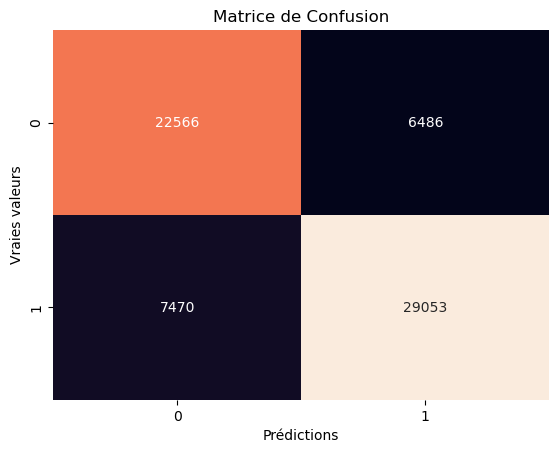

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score

y_pred_boost = model_boost.predict(X_test)
y_pred_boost_train = model_boost.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost))
print('Accuracy score train :', accuracy_score(y_train, y_pred_boost_train))
print('Recall test :', recall_score(y_test, y_pred_boost, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred_boost, average='macro'))

conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)

display(pd.crosstab(y_test, y_pred_boost, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_boost))

sns.heatmap(conf_matrix_boost, annot=True, fmt='d', cbar=False,
            xticklabels=model_boost.classes_,
            yticklabels=model_boost.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

## Interprétabilité du modèle

L'interprétabilité = la mesure dans laquelle un être humain peut prédire de manière cohérente le résultat d'un modèle.

Plus l'interprétabilité d'un modèle de Machine Learning est élevée, plus il est facile pour un individu de comprendre le raisonnement derrière certaines décisions ou prédictions. Un modèle est plus facilement interprétable qu'un autre si ses décisions sont plus faciles à comprendre pour un humain.

Les mesures de performances sont importantes, mais elles n'expliquent pas les décisions prédictives d'un modèle. Au fil du temps, les performances peuvent diminuer car le modèle n'est plus optimal par rapport à divers changements de distribution des variables explicatives. Il est donc important de comprendre ce qui pousse un modèle à prendre certaines décisions afin d'identifier les features auxquels un modèle serait très sensible et dont il faut surveiller la distribution au fil du temps.

Parfois un modèle peut réaliser de bonnes performances, mais après déploiement, on peut se rendre compte qu'il ne correspond pas à ce qu'on attendait. Il peut avoir une différence d'interprétation entre ce qu'on demande au modèle et sa compréhension de notre formaulation.

Les **trois aspects** les plus importants de l'interprétation des modèles sont expliqués par les questions suivantes:

**Qu'est-ce qui motive les prédictions du modèle ?** Interroger notre modèle et découvrir les interactions cachées entre les différentes features pour avoir une idée de celles qui pourraient être les plus importantes dans les prises de décisions du modèle. Cela permet de <ins>garantir l'équité du modèle</ins>.

**Pourquoi le modèle a-t-il pris une certaine décision ?** Valider et de justifier pourquoi certaines caractéristiques clés ont été à l'origine de certaines décisions prises par un modèle lors des prédictions. Cela permet de <ins>garantir la responsabilité et la fiabilité du modèle</ins>.

**Comment pouvons-nous faire confiance aux prédictions du modèle ?** Evaluer et valider la façon dont un modèle prend des décisions pour tout point de données. Ainsi, on peut démontrer et expliquer facilement que le modèle fonctionne comme prévu. Cela permet de <ins>garantir la transparence du modèle</ins>.


Deux types d'interprétabilité : l'interprétabilité ***intrinsèque*** et l'interprétabilité ***post hoc***.

**Interprétabilité intrinsèque :** Propre aux modèles eux-mêmes et découle de leur structure simple et transparente. Des exemples incluent les régressions linéaires (où les coefficients sont directement interprétables), les arbres de décision (où l'on peut suivre les branches pour comprendre les décisions), et les modèles basés sur des règles. Ces modèles sont conçus pour être compréhensibles par les humains sans nécessiter de méthodes d'analyse supplémentaires.

**Interprétabilité post hoc :** Pour les modèles complexes, qui ne sont pas naturellement transparents, et nécessite des techniques supplémentaires pour expliquer leurs prédictions après coup. Les méthodes post hoc incluent LIME (qui génère des explications locales en ajustant des modèles simples autour d'une instance spécifique) et ***SHAP (qui utilise des concepts de théorie des jeux pour attribuer à chaque feature une valeur d'importance)***. Ces techniques peuvent être appliquées à n'importe quel modèle de machine learning sans se baser sur la structure interne du modèle.


#### Interprétation de modèle avec SHAP

**SHAP** (SHapley Additive exPlanations) = package proposant une approche unifiée pour expliquer le résultat de ***tout modèle de Machine Learning***.\
SHAP relie la théorie des jeux aux explications locales, en se basant sur les valeurs de Shapley.

Les prédictions des modèles peuvent être expliquées en supposant que *chaque variable explicative est un "joueur"* dans un jeu où la *prédiction est le paiement*.\
La valeur de Shapley - une méthode issue de la théorie des jeux coopératifs - nous indique comment répartir équitablement le gain entre les variables.

***La valeur de Shapley***, est une méthode qui permet *d'attribuer les paiements aux joueurs en fonction de leur contribution au paiement total*. Les joueurs coopèrent au sein d'une coalition et obtiennent un certain gain de cette coopération.

**Le jeu** est la tâche de prédiction pour <ins>une seule instance du jeu de données</ins>.

**Le gain** est la <ins>prédiction réelle pour cette instance moins la prédiction moyenne de toutes les instances</ins>.

Les joueurs sont les valeurs pour chaque variable de l'instance, qui collaborent pour recevoir le gain (= prédire une certaine valeur).

**L'objectif** est d'expliquer la <ins>différence entre la prévision réelle et la prévision moyenne</ins>.\
La valeur de Shapley est la contribution marginale moyenne de la valeur d'une variable sur toutes les coalitions possibles. Les coalitions sont essentiellement des combinaisons de variables qui sont utilisées pour estimer la valeur Shapley d'une variable spécifique. La ***valeur de Shapley est la moyenne (pondérée) des contributions marginales***. Lorsque nous assemblons la valeur de Shapley pour toutes les variables, nous obtenons la distribution complète de la prédiction (moins la moyenne) parmi les valeurs des variables.

**SHAP est une amélioration des valeurs de Shapley**. SHAP attribue à *chaque variable une valeur d'importance pour une prédiction particulière*.\
En général, les <ins>valeurs SHAP tentent d'expliquer la sortie d'un modèle</ins> (fonction) comme une ***somme des effets de chaque variable***. Les valeurs SHAP résultent de la moyenne de tous les ordres possibles. Il s'agit de la seule approche prouvée scientifiquement par la théorie des jeux comme cohérente.


In [83]:
# Importation des package nécessaire
import scipy.stats as stats
import shap


C:\Users\lancelot.delzant-dan\Anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [84]:
# Représentation du résultats des accidents suivant l'ensemble d'entrainement
y_train.value_counts()
print('Indenmes = ', y_train.value_counts()[0], ' soit ', np.round(y_train.value_counts(normalize=True)[0]*100, 1), '%')
print('Blessé = ', y_train.value_counts()[1], ' soit ', np.round(y_train.value_counts(normalize=True)[1]*100, 1), '%')

Indenmes =  116472  soit  44.4 %
Blessé =  145825  soit  55.6 %


In [85]:
# Représentation du résultats des accidents suivant l'ensemble de test
y_test.value_counts()
print('Indenmes = ', y_test.value_counts()[0], ' soit ', np.round(y_test.value_counts(normalize=True)[0]*100, 1), '%')
print('Blessé = ', y_test.value_counts()[1], ' soit ', np.round(y_test.value_counts(normalize=True)[1]*100, 1), '%')

Indenmes =  29052  soit  44.3 %
Blessé =  36523  soit  55.7 %


### Interprétation globale du modèle

In [87]:
explainer = shap.Explainer(model_boost)
shap_values_all = explainer(X_test)
shap_values_all

.values =
array([[-0.17349869, -0.1961797 , -0.20407453, ...,  0.01582022,
        -0.0220026 , -0.03760566],
       [ 0.46013227, -0.12225432, -0.09868024, ...,  0.02329929,
         0.03370655, -0.02921033],
       [-0.14744575,  0.22346264, -0.19936718, ...,  0.02537331,
         0.25219548, -0.0314517 ],
       ...,
       [-0.18843184, -0.10490303, -0.15906558, ..., -0.41603224,
         0.02360137, -0.03172892],
       [ 0.45278165, -0.19780283, -0.10358031, ...,  0.02033395,
        -0.00936434, -0.03792345],
       [-0.11097914, -0.11882789,  0.41294626, ...,  0.02013384,
         0.01294831, -0.02905535]])

.base_values =
array([0.39198528, 0.39198528, 0.39198528, ..., 0.39198528, 0.39198528,
       0.39198528])

.data =
array([[1, 2, 1, ..., False, False, False],
       [2, 2, 1, ..., False, False, False],
       [1, 1, 1, ..., False, True, False],
       ...,
       [1, 2, 1, ..., True, False, False],
       [2, 2, 1, ..., False, False, False],
       [1, 2, 0, ..., False, F

La variable shap_values a trois attributs : .values, .base_values et .data.

.data = une copie des données d'entrée

.base_values = valeur attendue de la cible ou la valeur cible moyenne de toutes les données de train

.values = valeurs SHAP pour chaque ligne


In [89]:
print(f"Valeur Shapley de Référence moyenne : {shap_values_all.base_values[0]}")

Valeur Shapley de Référence moyenne : 0.3919852842909849


In [90]:
# Analyse des valeurs shap

explainer = shap.Explainer(model_boost)

shap_values = explainer.shap_values(X_test)

# Shap_values pour la classe 0 et la classe 1
shap_values


array([[-0.17349869, -0.1961797 , -0.20407453, ...,  0.01582022,
        -0.0220026 , -0.03760566],
       [ 0.46013227, -0.12225432, -0.09868024, ...,  0.02329929,
         0.03370655, -0.02921033],
       [-0.14744575,  0.22346264, -0.19936718, ...,  0.02537331,
         0.25219548, -0.0314517 ],
       ...,
       [-0.18843184, -0.10490303, -0.15906558, ..., -0.41603224,
         0.02360137, -0.03172892],
       [ 0.45278165, -0.19780283, -0.10358031, ...,  0.02033395,
        -0.00936434, -0.03792345],
       [-0.11097914, -0.11882789,  0.41294626, ...,  0.02013384,
         0.01294831, -0.02905535]])

In [91]:
print('shap_values shape : ', shap_values.shape)

print("Shap_values uniquement pour l'usager 1")
shap_values[1]

shap_values shape :  (65575, 115)
Shap_values uniquement pour l'usager 1


array([ 4.60132273e-01, -1.22254316e-01, -9.86802412e-02, -1.43477905e-01,
        4.22358135e-03,  3.01704864e-03, -8.18751475e-03, -8.49924356e-03,
       -1.98743306e-03, -8.83838476e-02, -1.81227237e-02, -4.21074885e-03,
       -2.94922038e-02,  1.75239729e-03,  1.47305952e-03, -1.21369013e-01,
       -2.74243919e-01, -7.90605836e-02,  3.23006621e-02,  0.00000000e+00,
        2.90684405e-02,  1.25658996e-02,  1.03016865e-03, -4.54850254e-03,
       -2.44471843e-03,  7.03819819e-03, -3.57325814e-02, -3.05068463e-02,
       -5.43272345e-02,  5.19410006e-03, -1.18812694e-02,  1.27203311e-02,
       -2.48242584e-03,  1.16615786e-02,  2.57978400e-02, -8.70272179e-02,
        8.80810687e-02, -1.37957495e-02,  1.47827682e-02,  1.46375276e-02,
       -1.58196965e-02,  2.48856842e-02, -1.83940445e-03, -1.10788889e-03,
       -7.47527590e-04,  2.74808930e-03,  1.07489488e-02, -2.39321538e-03,
       -1.62972656e-02, -2.47567401e-02, -6.23608144e-03, -1.63500503e-02,
       -1.88103031e-03, -

In [92]:
feature_names = X_test.columns.to_list()
print(feature_names)

['sexe', 'agg', 'Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement', 'conducteur', 'passager_avant', 'passager_arrière', 'trajet_pro', 'trajet_perso', 'trajet_autre', 'catv_velo', 'catv_moto', 'catv_voiture', 'catv_utilitaire', 'catv_veh_remorque', 'catv_PL', 'catv_tracteur', 'catv_tram_train', 'catv_quad_3roues', 'catv_autre_inconnu', 'catv_bus_car', 'catv_EDP', 'choc_avant', 'choc_arriere', 'choc_cote', 'choc_tonneaux', 'choc_aucun', 'manv_diverse', 'manv_droite', 'manv_gauche', 'manv_pas_chang_dir', 'manv_meme_sens_file', 'manv_inconnue', 'chaussee_bidirectionnelle', 'voie_reservee', 'chaussee_seche', 'int_aucune', 'int_branches', 'int_autre', 'atm_normal', 'senc_1', 'senc_2', 'senc_3', 'obs_1', 'obs_2', 'obs_3', 'obs_4', 'obs_5', 'obs_6', 'obs_7', 'obs_8', 'obs_9', 'obs_10', 'obs_11', 'obs_12', 'obs_13', 'obs_14', 'obs_15', 'obs_16', 'obs_17', 'obsm_1', 'obsm_2', 'obsm_4', 'obsm_5', 'obsm_6', 'obsm_9', 'motor_1', 'motor_2', 'moto

In [93]:
shap_values_df = pd.DataFrame(shap_values, columns=feature_names)
shap_values_df.shape

(65575, 115)

In [94]:
shap_values_df.head()

,sexe,agg,Ceinture,Casque,Dispositif enfants,Gilet réfléchissant,Airbag,Gants,Autre equipement,conducteur,...,lum_2,lum_3,lum_4,lum_5,col_2,col_3,col_4,col_5,col_6,col_7
0,-0.173499,-0.196180,-0.204075,-0.162555,0.002729,0.003732,-0.010213,-0.031303,-0.002071,-0.067010,...,-0.001436,-0.032759,-0.001765,-0.018511,0.044834,-0.314914,0.021652,0.015820,-0.022003,-0.037606
1,0.460132,-0.122254,-0.098680,-0.143478,0.004224,0.003017,-0.008188,-0.008499,-0.001987,-0.088384,...,-0.002044,-0.013152,-0.001425,-0.015093,0.015421,0.162466,-0.266279,0.023299,0.033707,-0.029210
2,-0.147446,0.223463,-0.199367,-0.079294,0.003594,0.003620,-0.009438,-0.031189,-0.001283,0.047330,...,-0.001496,-0.035927,-0.001463,-0.021437,0.072104,0.186182,0.058201,0.025373,0.252195,-0.031452
3,-0.141167,-0.121806,0.362128,-0.142918,0.002854,0.003918,-0.009186,-0.021542,-0.002461,-0.063831,...,-0.002786,-0.028790,-0.001277,0.115939,0.038302,-0.077130,0.043144,0.025985,0.001392,-0.034642
4,-0.174820,-0.095516,-0.167046,-0.131089,0.002601,0.003418,-0.009539,-0.022848,-0.001764,-0.093808,...,0.000454,-0.024290,-0.001061,0.129024,0.020604,0.200374,0.029229,-0.150882,0.017662,-0.038293


In [95]:
print(f"Moyenne des valeurs absolues des valeurs de Shap :\n{shap_values_df.abs().mean().sort_values(ascending=False)}")

Moyenne des valeurs absolues des valeurs de Shap :
catv_moto            0.471248
obsm_1               0.427034
Ceinture             0.243383
sexe                 0.213386
catv_velo            0.198984
                       ...   
obsm_6               0.000223
infra_7              0.000152
obsm_5               0.000085
catr_5               0.000060
catv_veh_remorque    0.000000
Length: 115, dtype: float64


In [96]:
print(f"Moyenne des Moyenne des valeurs absolues des valeurs de Shap : {shap_values_df.abs().mean().mean():.2f}")

Moyenne des Moyenne des valeurs absolues des valeurs de Shap : 0.04


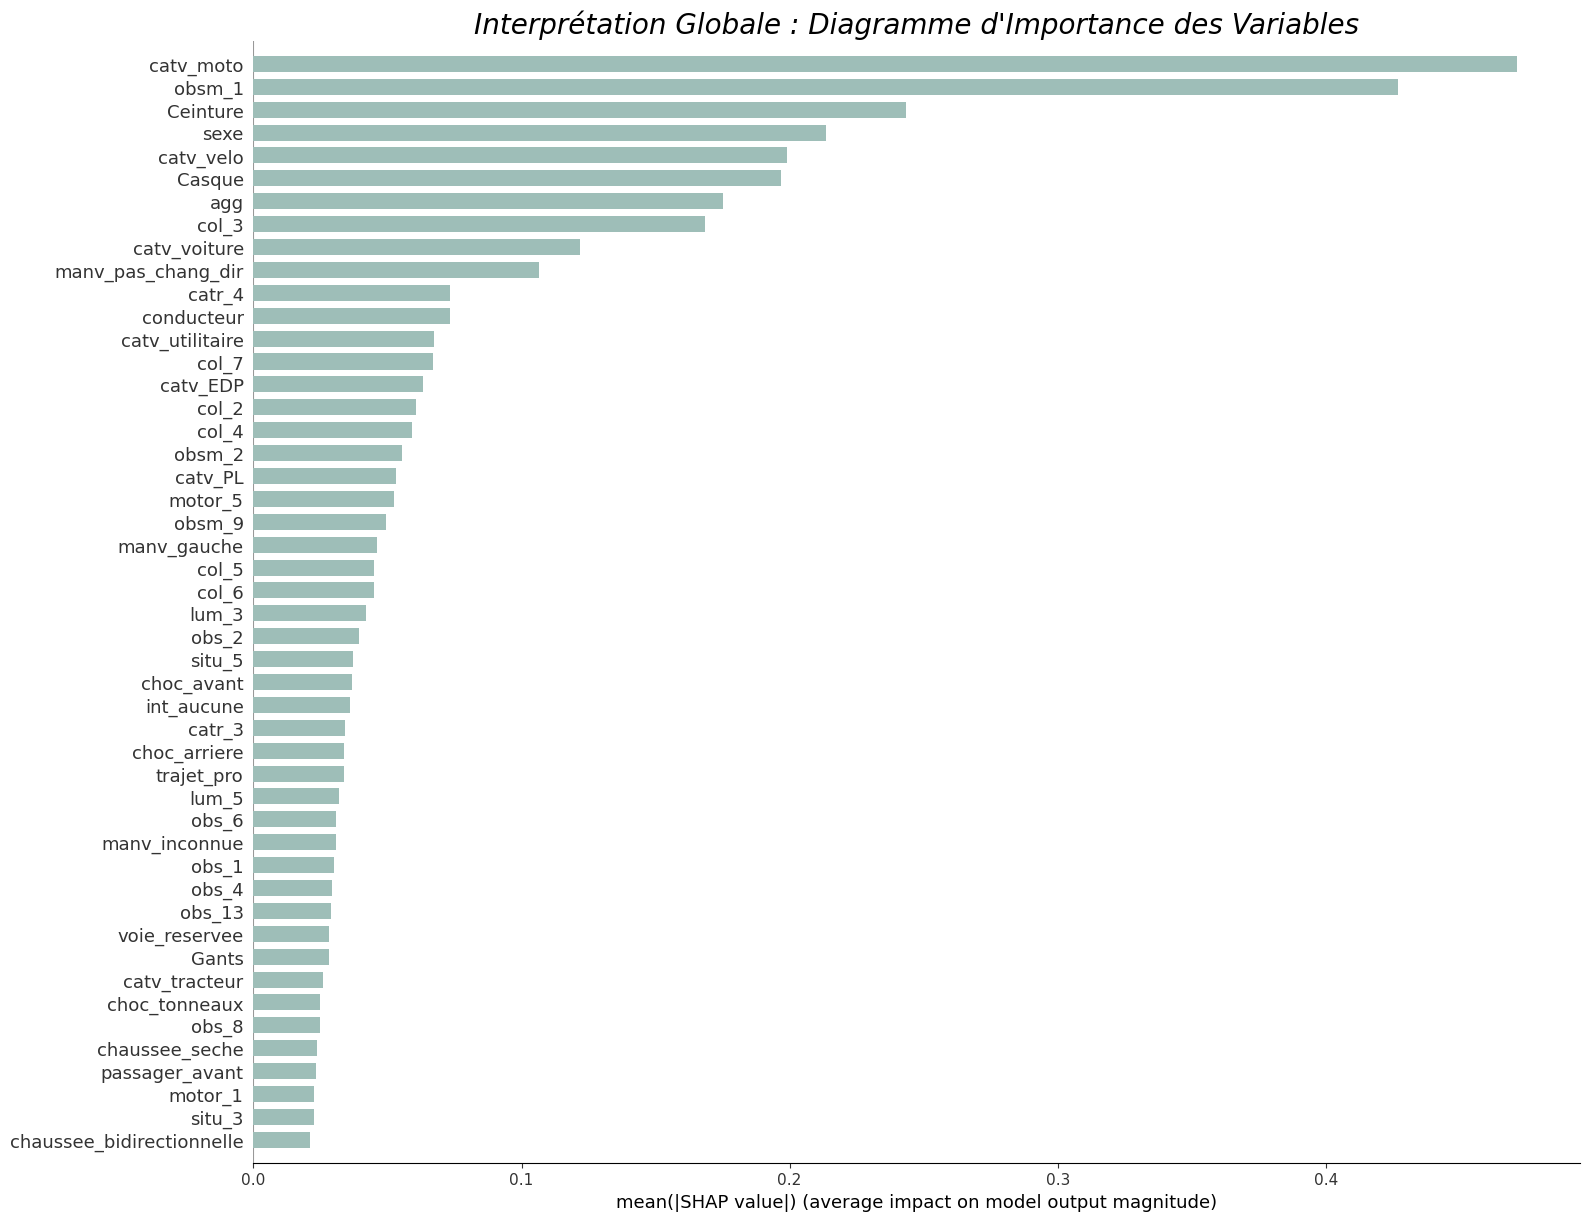

In [97]:
# visualisation de l'impact de chaque variables sur la prédiction

shap.summary_plot(shap_values, 
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  plot_type="bar",
                  color='#9ebeb8',
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.show();


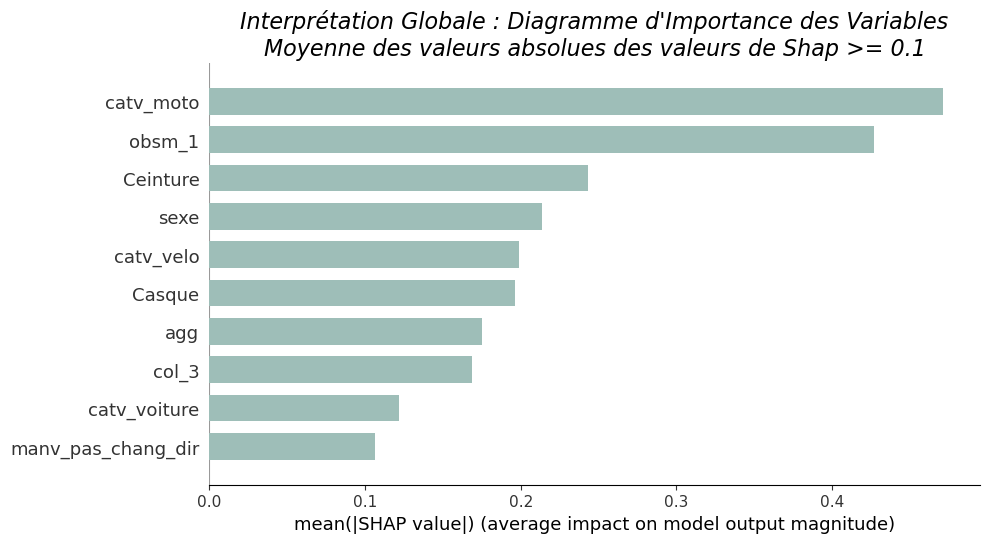

In [211]:
shap.summary_plot(shap_values, 
                  feature_names=feature_names,
                  plot_size=(10, 5),
                  color='#9ebeb8',
                  plot_type="bar",
                  max_display=10,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=16, fontstyle='italic')
plt.show();

Importance globale des variables en utilisant les valeurs de Shap.\
L’importance des variables est calculée en moyennant la valeur absolue des valeurs de Shap pour chaque exemple du dataset (chaque valeur de chaque variable).


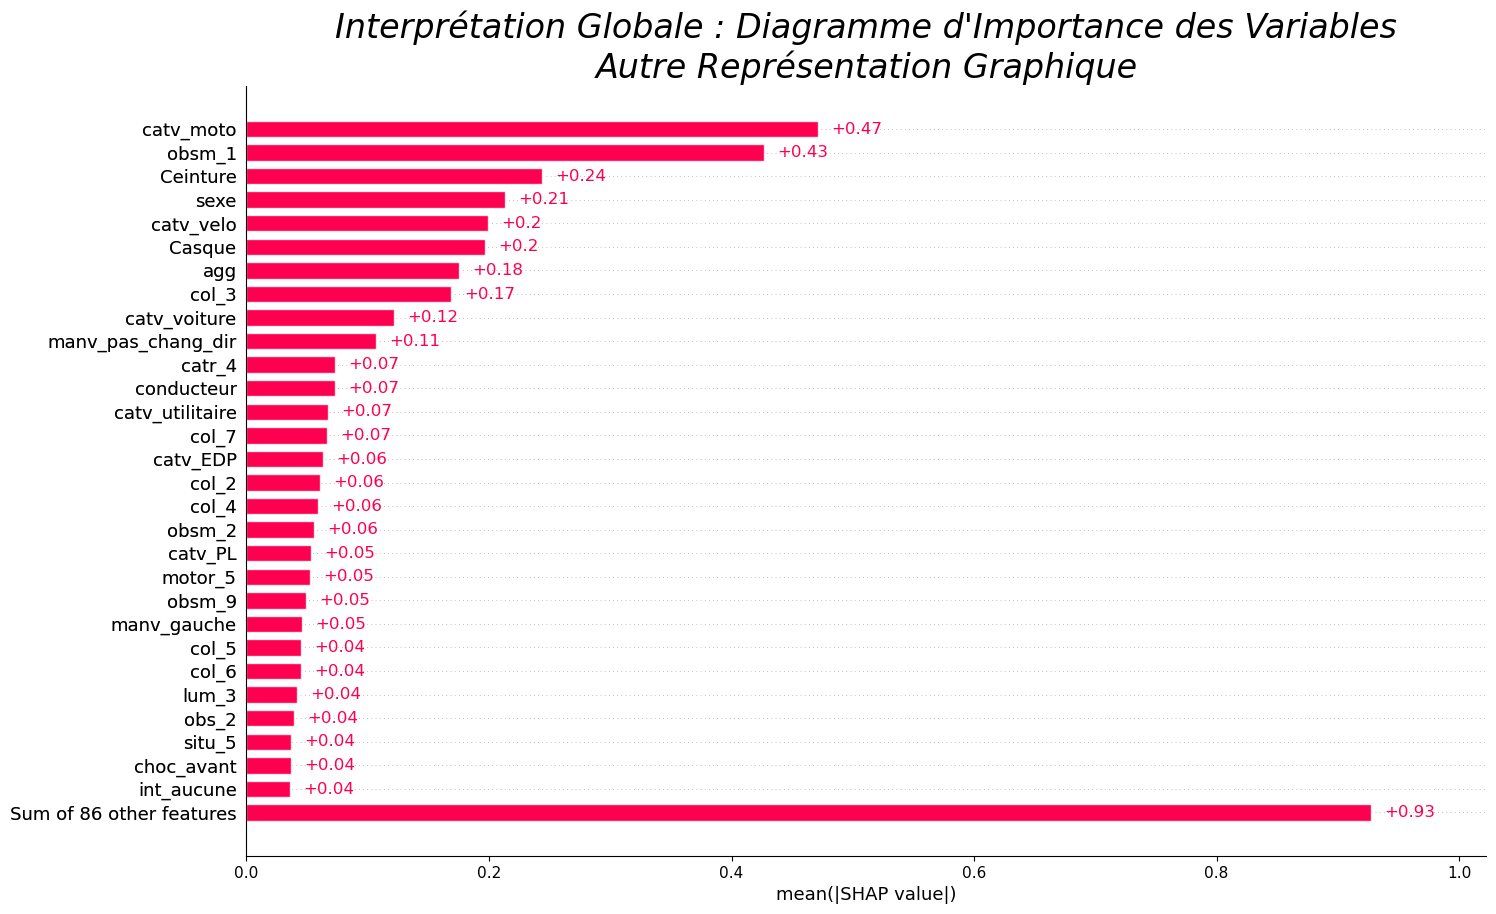

In [99]:
fig = plt.figure()
shap.plots.bar(shap_values_all, max_display=30, show=False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nAutre Représentation Graphique", 
          fontsize=24, fontstyle='italic')
plt.gcf().set_size_inches(16,10)
plt.show()

Ici, chaque feature est associée à une shapley value qui correspond à sa contribution marginale au sein du modèle. Plus la shapley value sera élevée, plus la feature a une contribution importante et est donc très utilisée par le modèle.

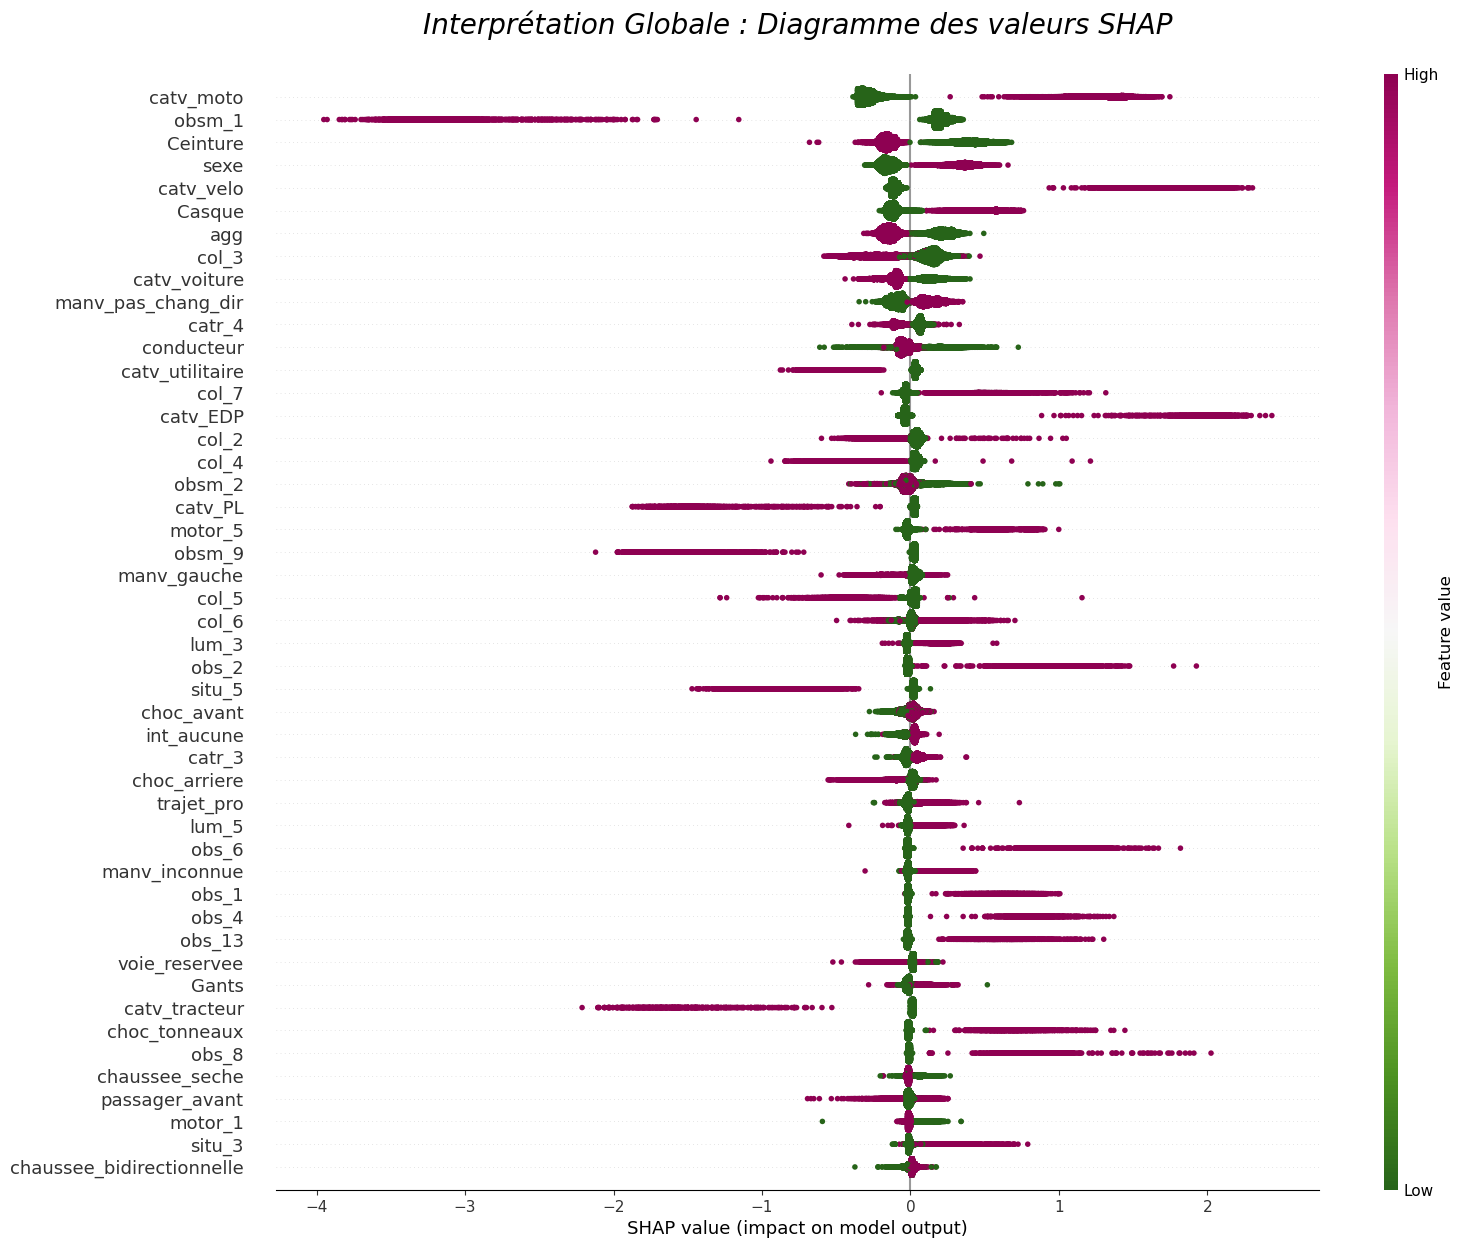

In [100]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values, 
                  features=X_test,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", 
          fontsize=20, fontstyle='italic')
plt.show();


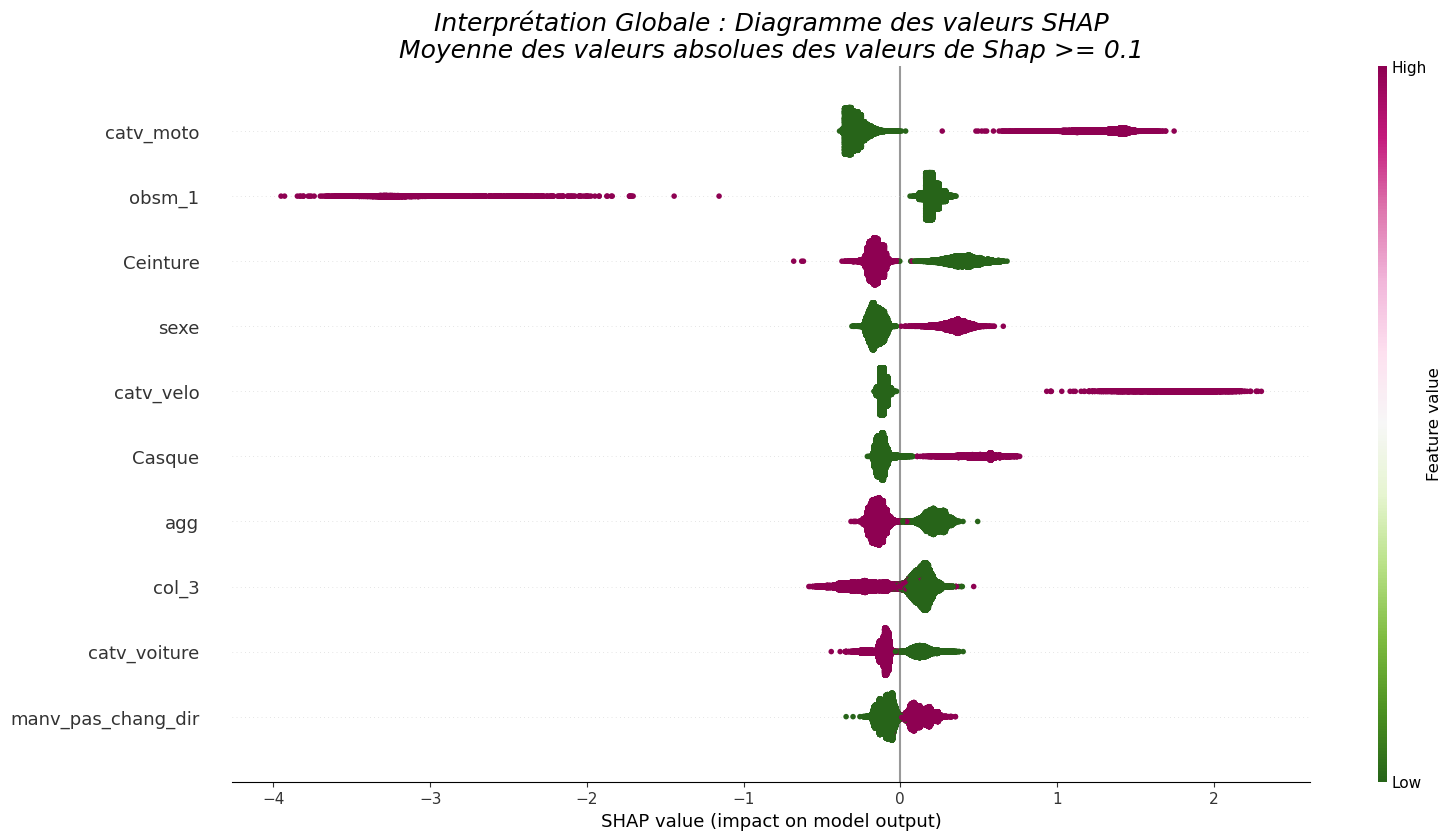

In [214]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values, 
                  features=X_test,
                  feature_names=feature_names,
                  plot_size=(16, 8),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=10,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.show();


Ce graphique est souvent préféré car il apporte plus d’informations et de manière claire. Il donne pour chaque feature un ensemble de shapley values (représenté par un nuage de point) qui représentent chacune une instance donnée.

Sur ce graphique, la couleur représente la valeur de la feature pour l’instance donnée. La shapley value est alors soit positive (et impacte les prédictions de manière positive), soit négative (et impacte les prédictions de manière négative).

On peut donc constater que la caractéristique « catv_moto » est significative, mais il semble également que si le véhicule n'est pas une moto alors cette variable a une influence négative sur le modèle. Cela signifie que, lorsque cette caractéristique est présente dans une prédiction, il y a de fortes chances que le modèle commette une erreur.


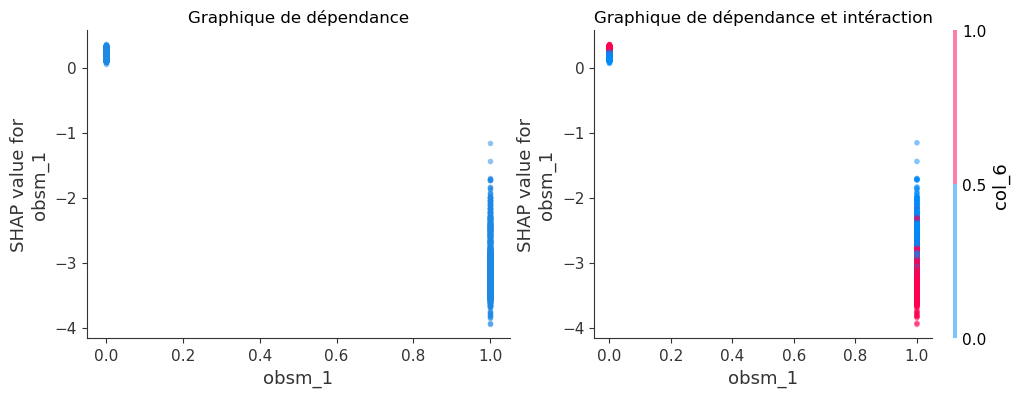

In [102]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("obsm_1", shap_values, X_test, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("obsm_1", shap_values, X_test, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();


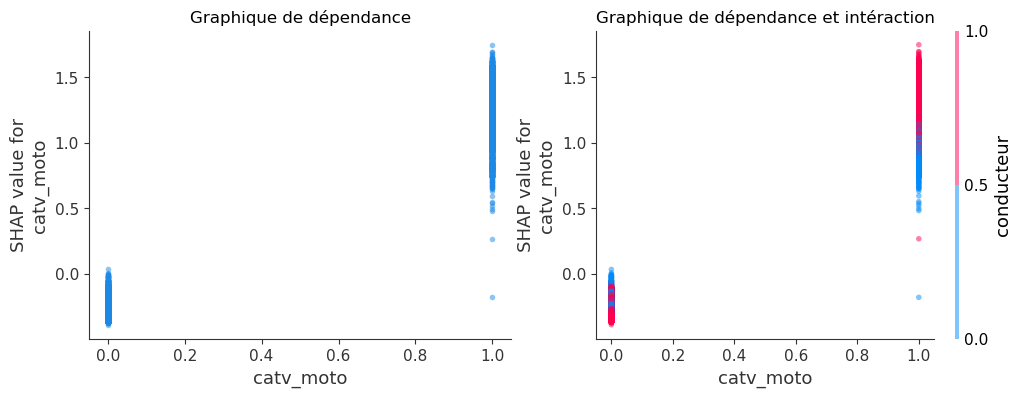

In [103]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("catv_moto", shap_values, X_test, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("catv_moto", shap_values, X_test, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();

**Si la catégorie du véhicule impliqué dans l'accident est une moto (moto ; valeur = 1), la valeur Shap augmente et par conséquent la probabilité que l'accident soit corporel augmente aussi.**

Grâce au graphique d'intercation, on constate aussi que si la personne accidentée est le conducteur du véhicule, on peut dire que lorsque son véhicule est une moto (valeur = 1), la valeur Shap augmente et par conséquent la probabilité que l'accident soit corporel augmente aussi.

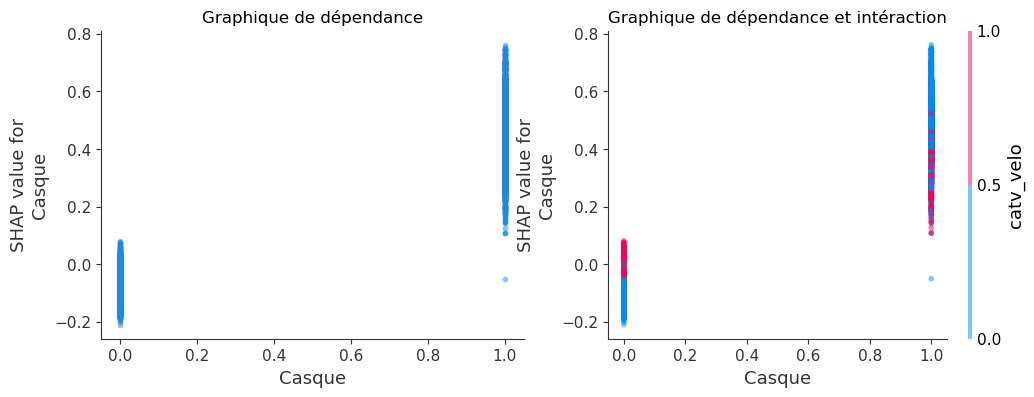

In [104]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("Casque", shap_values, X_test, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("Casque", shap_values, X_test, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();

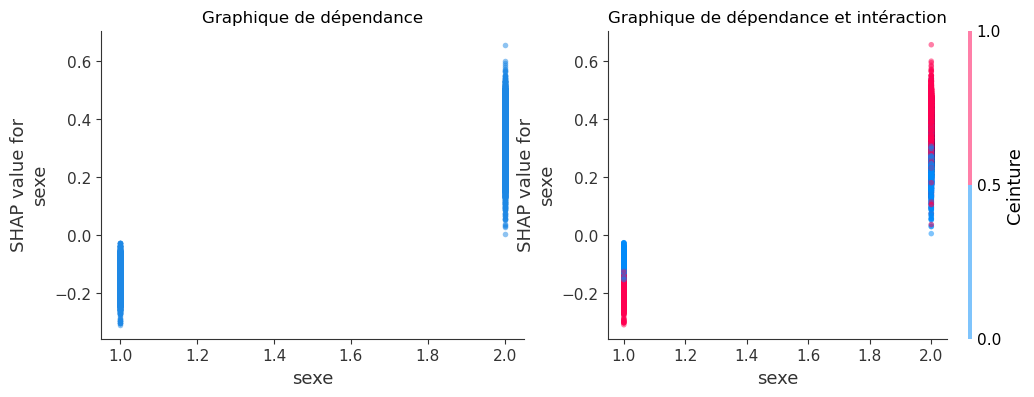

In [105]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("sexe", shap_values, X_test, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("sexe", shap_values, X_test, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();

### Interprétation locale

Pour comprendre et interpréter visuellement les résutats du modèle localement, c'est-à-dire pour une instance (ici un client) il existe trois alternatives: **force plot, decision plot et waterfall plot.**

Pour une instance, ces trois représentations sont redondantes, elles représentent l’information de manière très similaire. En même temps, certains éléments de ces graphiques sont complémentaires. En mettant côte à côte les trois, on comprend d’une manière plus intuitive le résultat.

**Le force plot** est bon pour voir où se <ins>place le “output value” par rapport à la “base value”</ins>. Nous observons également quelles variables ont un impact positif (rouge) ou négatif (bleu) sur la prédiction et l’amplitude de cet impact.

**Le waterfall plot** permet aussi de voir l’amplitude et la nature d’impact d’une variable avec sa quantification. Il permet de voir également <ins>l’ordre d’importance des variables et les valeurs prises par chacune des variables pour l’instance étudiée</ins>.

**Le Decision plot** permet d’observer l’amplitude de chaque changement, <ins>“une trajectoire” prise par une instance pour les valeurs des variables affichées.</ins>

On peut aussi représenter plusieurs instances en même temps avec le force plot et le decision plot.


In [107]:
# load JS visualization code to notebook
shap.initjs()

idx = 2
print("Usager numero : ", X_test.index[idx])
print("Model Prediction : Classe", y_pred_boost[idx])
print("Classe Réelle de l'usager :", y_test.loc[idx])
print("__"*40)

shap.force_plot(explainer.expected_value, 
                shap_values[idx], 
                X_test.iloc[idx,:],
                #link='logit',
                #plot_cmap = "PkYg",
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0)


Usager numero :  228673
Model Prediction : Classe 1
Classe Réelle de l'usager : 1
________________________________________________________________________________


Explication d’impact des variables pour un exemple du dataset. **En rouge, les variables qui ont un impact positif** (contribuent à ce que la prédiction soit plus élevée que la valeur de base) et, **en bleu, celles ayant un impact négatif** (contribuent à ce que la prédiction soit plus basse que la valeur de base).

La valeur de base du dataset est à 0.392 (moyenne des valeurs entre 0 (indenme) et 1 (blesé)), la prédiction de la valeur médiane de l'accident corporel par usagers pour l'usager dans l’exemple est 1.84. Nous étudions donc un exemple d'usager qui a une prédiction de valeur plus élevée que la moyenne et nous voyons les raisons du modèle pour lesquelles les valeurs sont plus élevées (contribution positive de obs_8, obsm_1, ...).

In [108]:
# Calculer les contributions marginales pour une observation spécifique
shap_values_idx = explainer(X_test.iloc[[idx]])

In [109]:
# Transformer les contributions marginales en un objet shap.Explanation
shap_exp = shap.Explanation(values=shap_values_idx[0], 
                            base_values=explainer.expected_value,
                            data=X_test.iloc[[idx]], 
                            feature_names=X_test.columns)


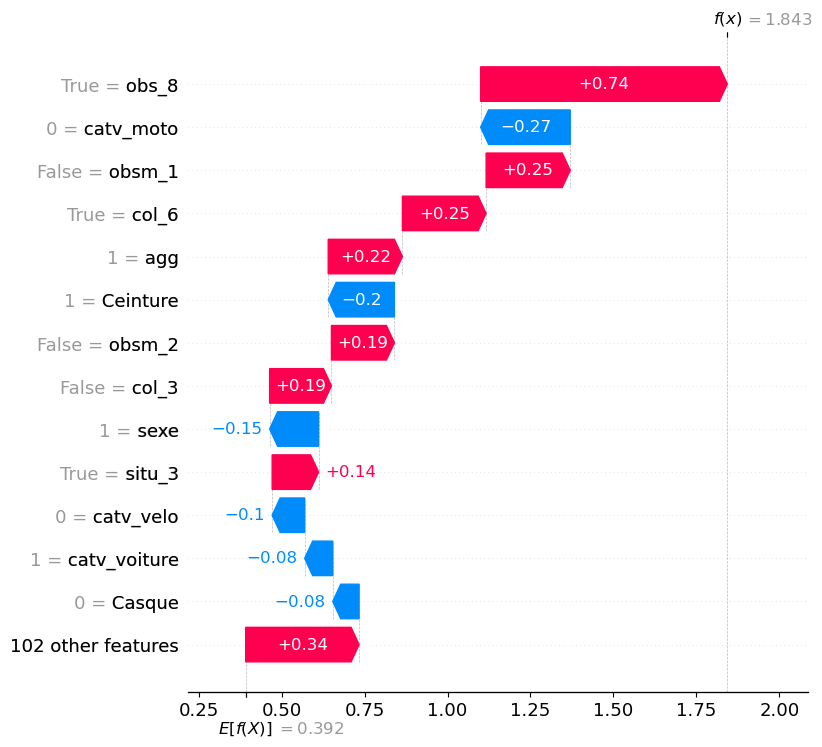

In [110]:
# Créer le graphique waterfall_plot
shap.waterfall_plot(shap_exp, 
                    max_display=14)


Le **graphique waterfall_plot** affiche les contributions marginales de chaque feature pour l'observation spécifique sélectionnée. Les features qui ont une contribution positive sont affichées en rouge, tandis que les features qui ont une contribution négative sont affichées en bleu.

Chaque barre représente la contribution marginale de chaque feature à la prédiction finale du modèle, et la barre totale représente la prédiction moyenne du modèle pour l'ensemble des observations. Le graphique permet de visualiser l'effet cumulatif des features sur la prédiction finale du modèle.


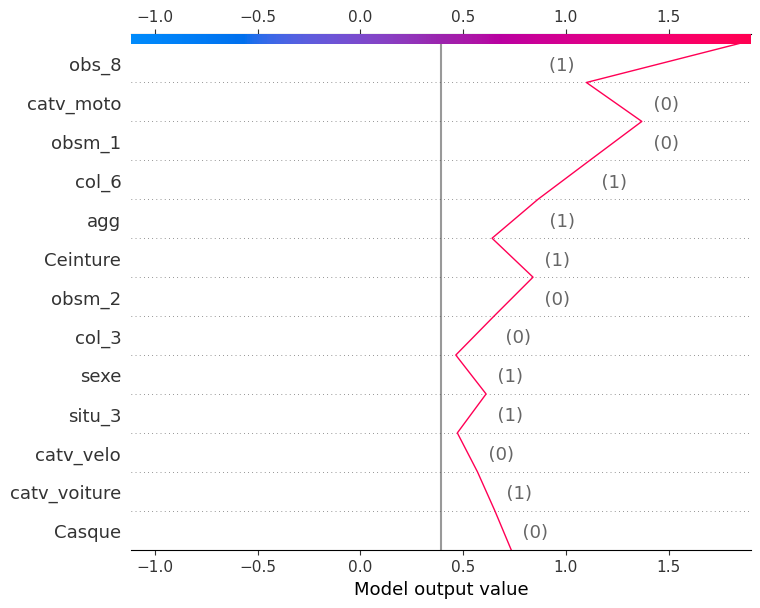

In [111]:
shap.decision_plot(explainer.expected_value, 
                   shap_values[idx], 
                   X_test.iloc[idx,:], 
                   feature_names=X_test.columns.to_list(),
                   feature_order='importance',
                   feature_display_range=slice(None, -14, -1))
                   #link='logit')


#### TreeExplainer

TreeExplainer de Shap permet d’accéder avec un temps de calcul raisonnable à une **approximation des valeurs de Shapley** dans le cas de **modèles d’arbre de décision ou d’ensembles d’arbres**.

Par cette approche, nous pouvons *calculer l’importance globale des variables mais surtout les effets des variables pour chaque exemple du dataset*.


In [114]:
tree_explainer = shap.TreeExplainer(model_boost)
shap_values = tree_explainer.shap_values(X_test)


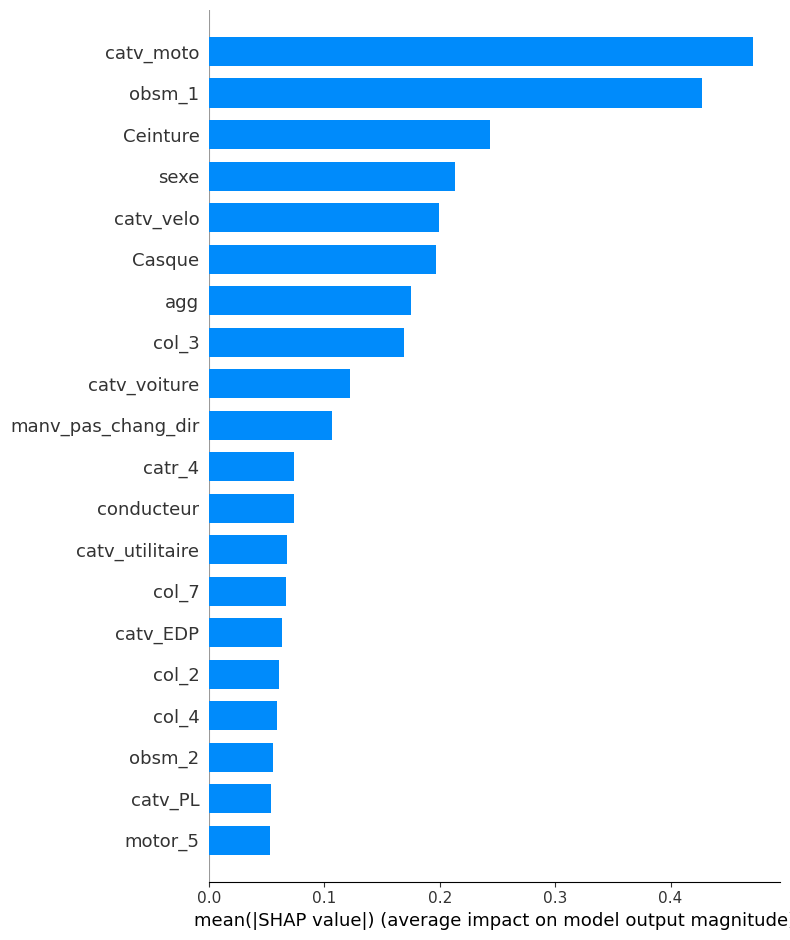

In [206]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

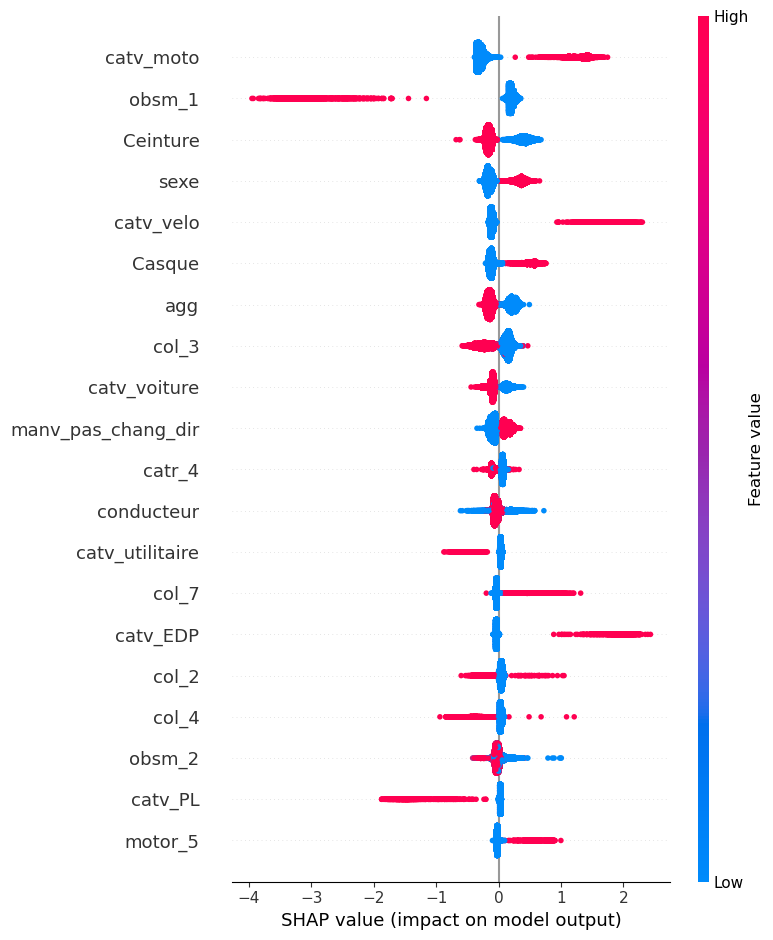

In [208]:
shap.summary_plot(shap_values, X_test)

Pas de différence entre TreeExplainer et Explainer pour notre jeu de données